In [2]:
path = "/home/sourav/cra"

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

In [4]:
from estimator import *

In [5]:
df = pd.read_csv(os.path.join(path, "data/simulated_data_n500.csv"))

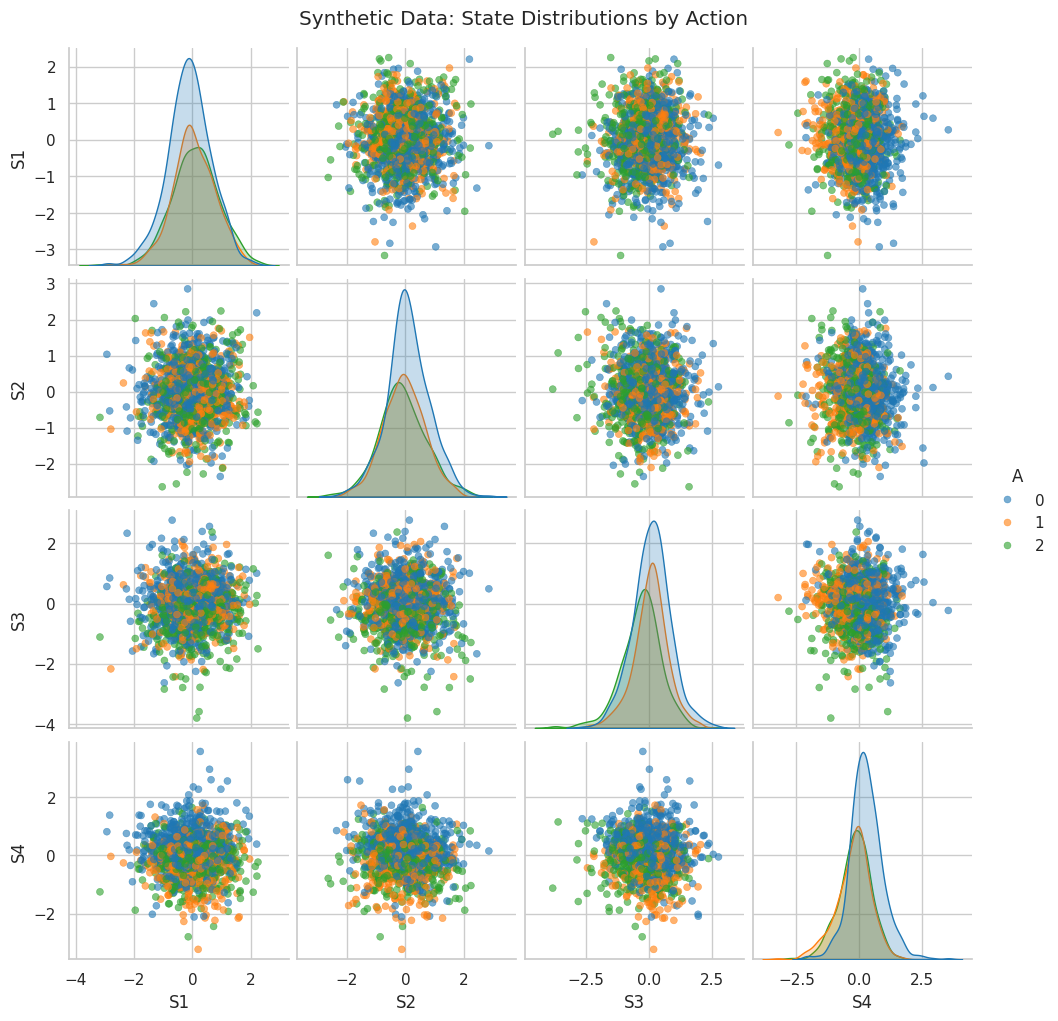

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig = sns.pairplot(
    df, 
    vars=["S1","S2","S3","S4"], 
    hue="A",
    palette="tab10",
    plot_kws={"alpha":0.6, "s":25, "edgecolor":None}
)
fig.fig.suptitle("Synthetic Data: State Distributions by Action", y=1.02)
plt.show()

save_path = "../plots/pairplot_simdata.png"
fig.fig.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [7]:
theta_correct, psi_correct = cra_estimator(df, features=["S1","S2","S3","S4"], k=3)
theta_m_miss, psi_m_miss = cra_estimator(df, features=["S1","S2"], k=3)
theta_e_miss, psi_e_miss = cra_estimator(df.sample(frac=1), features=["S3","S4"], k=3)

/home/sourav/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sourav/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sourav/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
true_mean = df.groupby("A")["R"].mean().values
print("True means:", true_mean)
print("CRA correct:", theta_correct)
print("CRA m-misspecified:", theta_m_miss)
print("CRA e-misspecified:", theta_e_miss)

True means: [-0.01246283  0.26867035  0.8457712 ]
CRA correct: [0.07748611 0.27885884 0.71010148]
CRA m-misspecified: [0.04080603 0.24193563 0.80073727]
CRA e-misspecified: [-0.00106275  0.32060197  0.78713218]
